In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.misc import derivative

import dm_density_profiles as dmd
import cgs as cgs

import df as df

using cgs py


In [7]:
np.random.rand(1)

array([ 0.59740492])

In [2]:
def test_function(r):
    r = np.asarray(r)
    scalar_input = False
    if r.ndim == 0:
        r = r[None]
        scalar_input = True
    rho = np.zeros(np.shape(r))
    rho[ r > 10 ] = r*r
    rho[ r <= 10] = r
            
    if scalar_input:
        return np.squeeze(rho)
    else:
        return rho

In [3]:
r = np.array([1.0,5.0,10.0,12.0])


In [4]:
test_function(1000.0)

array(1000000.0)

In [5]:
quad(test_function, 0.0, 24.0)

(4324.666666666666, 1.997150138777215e-05)

In [6]:
func = lambda x : quad(test_function,0.0, x)

In [7]:
#rom sympy import *

In [8]:
#r = Symbol('r')
#r_s = Symbol('r_s')dm_density_profiles.py:132: RuntimeWarning: divide by zero encountered in divide

#gamma = Symbol('gamma')
#alpha = Symbol('alpha')
#beta  = Symbol('beta')
#rho_s = Symbol('rho_s')



In [9]:
#rho = rho_s / ((r/r_s)**gamma * (1 + (r/r_s)**alpha)**((beta-gamma)/alpha))

In [10]:
#first_dir = diff(rho,r)

In [11]:
#first_dir

In [12]:
#first_dir.simplify()

In [13]:
#f = -(beta*(r/r_s)**alpha + gamma)/((r/r_s)**alpha + 1) * (1/r)
#diff(f,r).simplify()

In [14]:
NFW = dmd.general_dm_profile('NFW')

In [15]:
NFW.set_params(profile_shape_params=[1.0,3.0,1.0])

In [16]:
NFW.set_params(M_vir = 1.0E12 * cgs.Msun, r_vir = 240.0 * cgs.kpc)
NFW.set_params(r_decay = 0.1*NFW.r_vir, r_s = (1.0/12.0)*NFW.r_vir)

In [17]:
NFW.density(1000.0*cgs.pc)

array(7.440756927614033e-24)

In [18]:
r = np.linspace(0.001,500.0,1000.0)*cgs.kpc

In [19]:
rho = NFW.density(r)

In [20]:
drho_dr = NFW.first_derivative(r)

In [21]:
drho_drdr = NFW.second_derivative(r)

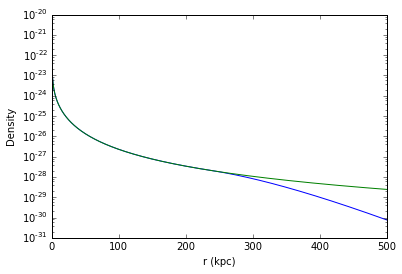

In [22]:
plt.plot(r/cgs.kpc,rho)

plt.plot(r/cgs.kpc, NFW.rho_s/((r/NFW.r_s)*(1.0+(r/NFW.r_s))**2))

plt.semilogy()
plt.xlabel('r (kpc)')
plt.ylabel('Density')

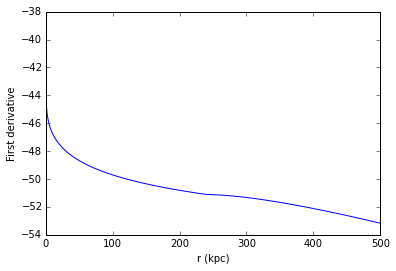

In [23]:
plt.plot(r/cgs.kpc, np.log10(-NFW.first_derivative(r)))
plt.xlabel('r (kpc)')
plt.ylabel(r'First derivative')

dm_density_profiles.py:151: RuntimeWarning: divide by zero encountered in true_divide
  rho = self.rho_s / ( c**gamma * (1.0 + c**alpha)**((beta-gamma)/alpha) )


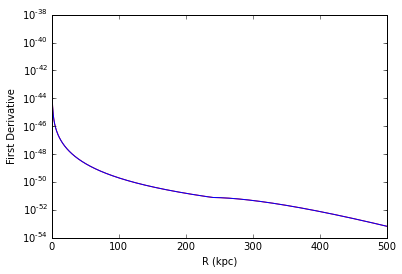

In [24]:
plt.plot(r/cgs.kpc, -derivative(NFW.density,r,dx=1.0*cgs.pc), color = 'red')
plt.plot(r/cgs.kpc, -NFW.first_derivative(r), color='blue')

plt.semilogy()
plt.xlabel('R (kpc)')
plt.ylabel('First Derivative')

[]

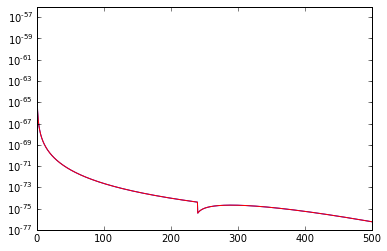

In [25]:
plt.plot(r/cgs.kpc, NFW.second_derivative(r))
plt.plot(r/cgs.kpc, derivative(NFW.first_derivative,r,dx=1.0*cgs.pc), color = 'red')

plt.semilogy()

[]

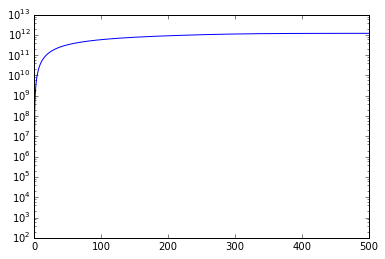

In [26]:
plt.plot(r/cgs.kpc, NFW.cumulative_mass(r)/cgs.Msun)
plt.semilogy()

In [27]:
print NFW.r_vir/cgs.kpc
print NFW.M_vir/cgs.Msun

print NFW.cumulative_mass(NFW.r_vir)/(NFW.M_vir)
print NFW.cumulative_mass(500*cgs.kpc)/(NFW.M_vir)

240.0
1e+12
1.0
1.19533180003


In [28]:
NFW.epsilon

7.153846153846153

In [29]:
10 - 37/13.0

7.153846153846153

In [30]:
np.pi * 3.0

9.42477796076938

In [31]:
rho_s = 12**3 * NFW.M_vir / (4.0 * np.pi * NFW.r_vir**3 * (np.log(1.0+12.0) - 12.0/(13.0)))

In [32]:
r = np.linspace(0.0, 500.0, 100.0)*cgs.kpc

In [33]:
pot_anal = -4.0*np.pi*cgs.G*NFW.rho_s*NFW.r_s**2 * np.log(1.0 + r / NFW.r_s) / (r/NFW.r_s)

/home/emerick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [34]:
pot, A, B = NFW.potential(r)

anal_A = -4.0*np.pi*cgs.G*(1.0/r) * ((1.0/(1.0+r/NFW.r_s))+np.log(1.0+r/NFW.r_s)-1)*NFW.r_s**3 * NFW.rho_s
anal_B = -4.0*np.pi*cgs.G*(NFW.r_s**2 * NFW.rho_s / (1.0 + (r/NFW.r_s)))


ValueError: too many values to unpack

In [ ]:
#NFW.large_r = 1.0E5*cgs.kpc

pot, A, B = NFW.potential(r)

print np.exp(-1.0E3),np.exp(-1.0E9),np.exp(-1.0E10)

plt.plot(r/cgs.kpc, pot)
plt.plot(r/cgs.kpc, pot_anal)
plt.xlabel('R (kpc)')
plt.ylabel('Potential')


error = np.abs((pot-pot_anal)/pot_anal)
error = error[r< 400*cgs.kpc]
error = error[~np.isnan(error)]
print np.average(error),np.max(error)

In [ ]:
print np.shape(r), np.shape(A)

plt.plot(r[r>0]/cgs.kpc, A, color = 'black')
plt.plot(r/cgs.kpc, anal_A, color = 'black',ls='--')

print np.max((anal_A[r>0]-A)/A)

In [ ]:
def integrand(x):
    
    
    density = NFW.rho_s / ((x/NFW.r_s)*(1.0+(x/NFW.r_s))**2)
    
    
    return x * density

def anal_B_func(x):
    return -4.0*np.pi*cgs.G*(NFW.r_s**2 * NFW.rho_s / (1.0 + (x/NFW.r_s)))


xval = 10.1010101*cgs.kpc
xmax = 100000000*cgs.kpc

integrated_B = quad(integrand, xval, xmax)
    
    
print integrated_B

final_B = -1.0*integrated_B[0] * 4.0 * cgs.G * np.pi

print final_B
print anal_B_func(xval)

print (final_B-anal_B_func(xval))/anal_B_func(xval)

In [ ]:
pot, A, B = NFW.potential(r)

plt.plot(r[r>0]/cgs.kpc, -B, color = 'black')
plt.plot(r/cgs.kpc, -anal_B, color = 'black',ls='--')
plt.semilogy()
print np.max((anal_B[r>0]-B)/B)


In [ ]:
plt.plot(r/cgs.kpc, pot)
plt.plot(r[r>0]/cgs.kpc, A+B)
plt.plot(r/cgs.kpc, anal_A + anal_B)

In [ ]:
p = NFW.dPhi_dr(r)
plt.plot(r/cgs.kpc, p)
plt.xlabel('R (kpc)')
plt.ylabel('First Derivative of Potential')

In [ ]:
p = NFW.d2Phi_dr2(r)
plt.plot(r/cgs.kpc, p)
plt.xlabel('R (kpc)')
plt.ylabel('Second Derivative of Potential')

In [ ]:
dddr = NFW.first_derivative(1.0E2*cgs.kpc)
dpdr = NFW.dPhi_dr(1.0E2*cgs.kpc)

print dddr, dpdr, 1.0/dpdr
print dddr/dpdr

In [ ]:
print 'line 1 %.2f'%(199.0),
res = 10.0 + 1000.0
print 'line 2'
print res